<a href="https://colab.research.google.com/github/pdpcosta/COVID-19_Brazil/blob/master/COVID_19_Brasil_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
url='https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/COVID-19_Brazil_States_CONFIRMED.csv'
df=pd.read_csv(url)
print(df)
#df=pd.read_csv('/content/gdrive/Shared drives/COVID-19/Data/COVID-19_Brazil_States_CONFIRMED.csv')
df['Date']=pd.to_datetime(df['Date'])
#df=df.astype({"Confirmed":int})
print(df.dtypes)
df=df.dropna()


    Region State        Date  Confirmed
0    North    AC  2020-02-25        0.0
1    North    AC  2020-02-26        0.0
2    North    AC  2020-02-27        0.0
3    North    AC  2020-02-28        0.0
4    North    AC  2020-02-29        0.0
..     ...   ...         ...        ...
806  North    TO  2020-03-21        2.0
807  North    TO  2020-03-22        5.0
808  North    TO  2020-03-23        7.0
809  North    TO  2020-03-24        7.0
810  North    TO  2020-03-25        7.0

[811 rows x 4 columns]
Region               object
State                object
Date         datetime64[ns]
Confirmed           float64
dtype: object


# Identifying the Top 5 States in Number of Confirmed Cases


In [2]:
topfivestates=df[df.Date==pd.Timestamp(2020,3,23)].sort_values('Confirmed',ascending = False).head(5)
print ("Top 5 States in Number of Cases\n",topfivestates)


Top 5 States in Number of Cases
         Region State       Date  Confirmed
778  Southeast    SP 2020-03-23      745.0
568  Southeast    RJ 2020-03-23      233.0
177  Northeast    CE 2020-03-23      164.0
207    Midwest    DF 2020-03-23      146.0
327  Southeast    MG 2020-03-23      128.0


# A Simple Graph of the Top 5 States in Confirmed Cases

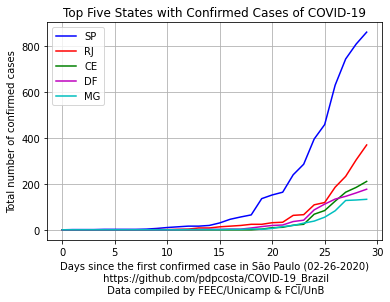

In [4]:
# SP was the first state with confirmed cases in Brazil, so it is used as a reference.
sp=df[df.State=="SP"]
days_sp=np.asarray(range(len(sp)))
sp_epidemy=sp[(sp['Confirmed']>0)]


n1state=topfivestates["State"].iloc[0]
n2state=topfivestates["State"].iloc[1]
n3state=topfivestates["State"].iloc[2]
n4state=topfivestates["State"].iloc[3]
n5state=topfivestates["State"].iloc[4]

confirmedn1=df[(df['State']==n1state)]
confirmedn2=df[(df['State']==n2state)]
confirmedn3=df[(df['State']==n3state)]
confirmedn4=df[(df['State']==n4state)]
confirmedn5=df[(df['State']==n5state)]
#print(n1state,n2state,n3state,n4state,n5state)

plt.title("Top Five States with Confirmed Cases of COVID-19")
plt.plot(days_sp,confirmedn1['Confirmed'],label=n1state,color="b") #Real data
plt.plot(days_sp,confirmedn2['Confirmed'],label=n2state,color="r") #Real data
plt.plot(days_sp,confirmedn3['Confirmed'],label=n3state,color="g") #Real data
plt.plot(days_sp,confirmedn4['Confirmed'],label=n4state,color="m") #Real data
plt.plot(days_sp,confirmedn5['Confirmed'],label=n5state,color="c") #Real data
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Days since the first confirmed case in São Paulo (02-26-2020)\n https://github.com/pdpcosta/COVID-19_Brazil\n Data compiled by FEEC/Unicamp & FCI/UnB")
plt.ylabel("Total number of confirmed cases")
plt.show()



# A data-based Logistic Model for São Paulo, considering the time series

        Region State       Date  Confirmed
779  Southeast    SP 2020-03-24      810.0
780  Southeast    SP 2020-03-25      862.0


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


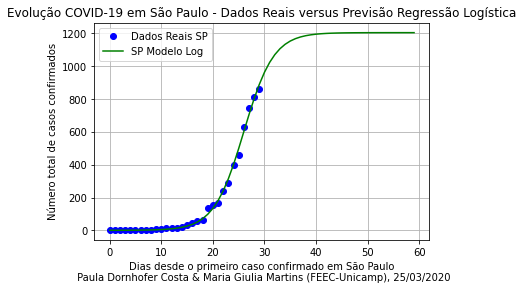

In [8]:
sp=df[df.State=="SP"]

sp_epidemy=sp[(sp['Confirmed']>0)]
sp_day1=sp_epidemy['Date'].iloc[0]
sp_day1=sp_day1-pd.Timedelta(days=1)
sp_epidemy=sp[(sp['Date']>=sp_day1)]

# print(sp_epidemy)

def exponential_model(x, a, b, c):
     return a*np.exp(b*(x-c))

def logistic_model (x, a, b, c):
  return c/(1+np.exp(-(x-b)/a))

expfit_sp=curve_fit(exponential_model,np.asarray(range(len(sp_epidemy))),sp_epidemy['Confirmed'],p0=[1,1,1])
logfit_sp=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy))),sp_epidemy['Confirmed'],p0=[1,1,1])

days1=np.asarray(range(len(sp_epidemy))) # SP is the first state with epidemy in Brazil
days=np.asarray(range(60))
plt.title("Evolução COVID-19 em São Paulo - Dados Reais versus Previsão Regressão Logística")
plt.plot(days1,sp_epidemy['Confirmed'],'ro',label="Dados Reais SP",color="b") #Real data
plt.plot(days, [logistic_model(i,logfit_sp[0][0],logfit_sp[0][1],logfit_sp[0][2]) for i in days], label="SP Modelo Log", color = 'g' )#Predicted exponential curve
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 25/03/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()



# How the model changed in the last 3 days for São Paulo

This plot shows how the logistic regression is sensitive to new data.

Our dataset has data until 2020-03-25.
In *red*, we see the logistic model obtained with São Paulo data until 2020-03-23 (2 days before).

In *yellow*, we see the logistic model obtained with São Paulo data until 2020-03-24 (1 day before).

Finally, in *green*, we see the logistic model obtained with most recent data.

This graph may suggest that São Paulo is slowing the rate of COVID-19 spread.

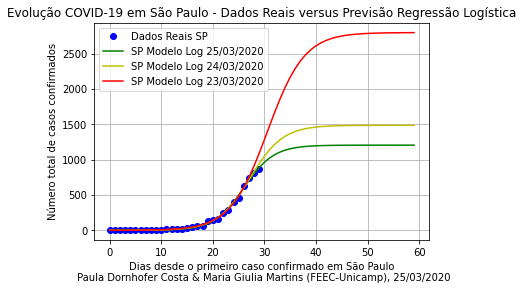

In [14]:
db2=sp_epidemy.tail(2)['Date'].iloc[0] # 2 days before
db3=sp_epidemy.tail(3)['Date'].iloc[0] # 3 days before

logfit_sp_db2=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy)-1)),sp_epidemy.loc[sp_epidemy['Date']<=db2,'Confirmed'],p0=[1,1,1])
logfit_sp_db3=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy)-2)),sp_epidemy.loc[sp_epidemy['Date']<=db3,'Confirmed'],p0=[1,1,1])

plt.title("Evolução COVID-19 em São Paulo - Dados Reais versus Previsão Regressão Logística")
plt.plot(days1,sp_epidemy['Confirmed'],'ro',label="Dados Reais SP",color="b") #Real data
plt.plot(days, [logistic_model(i,logfit_sp[0][0],logfit_sp[0][1],logfit_sp[0][2]) for i in days], label="SP Modelo Log 25/03/2020", color = 'g' )#Predicted exponential curve
plt.plot(days, [logistic_model(i,logfit_sp_db2[0][0],logfit_sp_db2[0][1],logfit_sp_db2[0][2]) for i in days], label="SP Modelo Log 24/03/2020", color = 'y' )#Predicted exponential curve
plt.plot(days, [logistic_model(i,logfit_sp_db3[0][0],logfit_sp_db3[0][1],logfit_sp_db3[0][2]) for i in days], label="SP Modelo Log 23/03/2020", color = 'r' )#Predicted exponential curve
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 25/03/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()
